### Import Packages

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#scikit learn library
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [31]:
import pickle
from sklearn.externals import joblib

### Global Variables

In [32]:
# Create Global Variables If Necessay
projectName = 'HeartDisease'
datasetPath = 'D:/MS COMPUTER SCIENCE/Programing_Practice/Data Science/HeartDiseasePredictor/'
modelSavePath = 'D:/MS COMPUTER SCIENCE/Programing_Practice/Data Science/HeartDiseasePredictor/'

### Custom Functions

In [33]:
def plot_corr(df):
    corr=df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Data Preprocessing

In [69]:
df = pd.read_csv(datasetPath + 'Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [70]:
# Get The Number Of Unique Values From Each Column and Encode Categorical Data
from sklearn.preprocessing import LabelEncoder
labelencoder_df = LabelEncoder()
for col in list(df.columns)[:-1]:
    if len(df[col].unique()) < 10:
        df[col] = labelencoder_df.fit_transform(df[col])

### Feature Selection Using Pearson Correlation

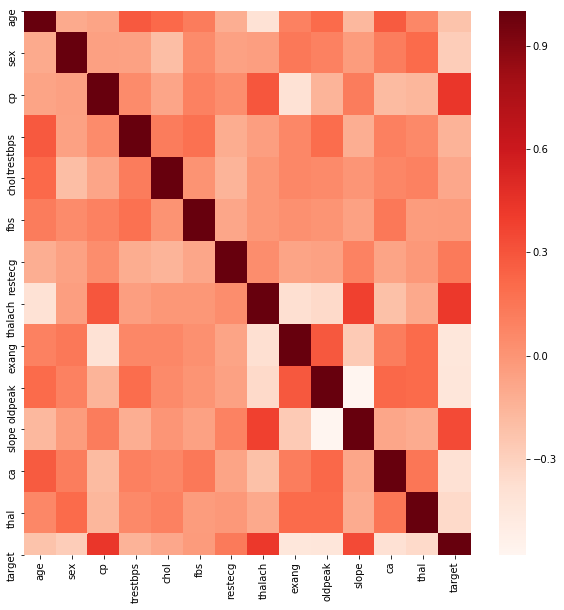

In [71]:
# Compute Pearson Correlation
cor = df.corr()

#Correlation with output variable
cor_target = abs(cor['target'])

# Plot Correlation Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

In [72]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
print(relevant_features)

age         0.225439
sex         0.280937
cp          0.433798
trestbps    0.144931
chol        0.085239
fbs         0.028046
restecg     0.137230
thalach     0.421741
exang       0.436757
oldpeak     0.430696
slope       0.345877
ca          0.391724
thal        0.344029
target      1.000000
Name: target, dtype: float64


### Create Testing and Training Data

In [73]:
#SEPERATE LABEL COLUMN FROM FEATURE COLUMNS
df_label = df['target'].values
df.drop(['target'], axis=1, inplace=True)
df_feature = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']].values

#SPLIT TRAINING SET AND TESTING SET
from sklearn.model_selection._split import train_test_split
feature_train,feature_test,label_train,label_test = train_test_split(df_feature, df_label, test_size=0.20, random_state=39)

### Data Modeling

In [77]:
#DECISION TREE
model_DT = DecisionTreeClassifier()
model_DT.fit(feature_train,label_train)
predicted_values_DT = model_DT.predict(feature_test)

#RANDOM FOREST CLASSIFIER
model_RF = RandomForestClassifier(random_state=39, n_estimators=100)
model_RF.fit(feature_train,label_train)
predicted_values_RF = model_RF.predict(feature_test)

#GRADIENT BOOSTING ALGORITHM
model_GB= GradientBoostingClassifier(n_estimators=50, random_state=39)
model_GB.fit(feature_train, label_train)
predicted_values_GBA = model_GB.predict(feature_test)

### Meassure Accuracy

In [78]:
accuracy = dict()
accuracy['DecisionTree'] = accuracy_score(predicted_values_DT,label_test)*100
accuracy['RandomForest'] = accuracy_score(predicted_values_RF,label_test)*100
accuracy['GBA'] = accuracy_score(predicted_values_GBA,label_test)*100
#accuracy['Max_accuracy'] = 100
accuracy=pd.DataFrame(list(accuracy.items()),columns=['Algorithm','Accuracy'])
print(accuracy)

      Algorithm   Accuracy
0  DecisionTree  78.688525
1  RandomForest  83.606557
2           GBA  81.967213


### Plot Accuracy

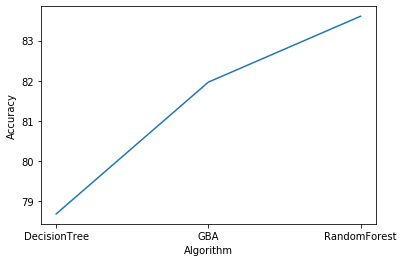

In [79]:
sns.lineplot(x='Algorithm',y='Accuracy',data=accuracy)

### Save Model

In [80]:
# Save The Models Performing Well As A Pickle String. 
save_Model_DT = pickle.dumps(model_DT)
save_Model_RF = pickle.dumps(model_RF)
save_Model_GB = pickle.dumps(model_GB)

# Save The Pickle Model In A File 
joblib.dump(save_Model_DT, modelSavePath + projectName + '_DecisionTreeModel.pkl')
joblib.dump(save_Model_RF, modelSavePath + projectName + '_KNNModel.pkl')
joblib.dump(save_Model_GB, modelSavePath + projectName + '_GradientBoostModel.pkl')

['D:/MS COMPUTER SCIENCE/Programing_Practice/Data Science/HeartDiseasePredictor/HeartDisease_GradientBoostModel.pkl']

### Make Single Predictions

In [23]:
# Load the pickled model 
load_Model_DT = joblib.load(modelSavePath + projectName + '_DecisionTreeModel.pkl')
load_Model_RF = joblib.load(modelSavePath + projectName + '_KNNModel.pkl')
load_Model_GB = joblib.load(modelSavePath + projectName + '_GradientBoostModel.pkl')
  
# Use the loaded pickled model to make predictions 
#load_Model_DT.predict(X_test)